# Instructions
Click the run button in order from top to bottom for items with "In [ ]" next to them.

## Import the Libraries to Use

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection

## Read csv Into a Data Frame

In [32]:
df = pd.read_csv("exams.csv")

## Table Head
Shows the first ten rows to get an idea of the data we're working with

In [33]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


## Bar Graph
Shows number of male and female students

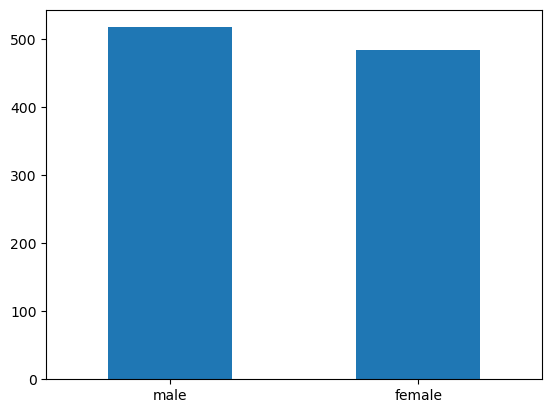

In [34]:
df["gender"].value_counts().plot(kind="bar", rot=0);

## Scatter Plots
Shows correlation between grades in different subjects

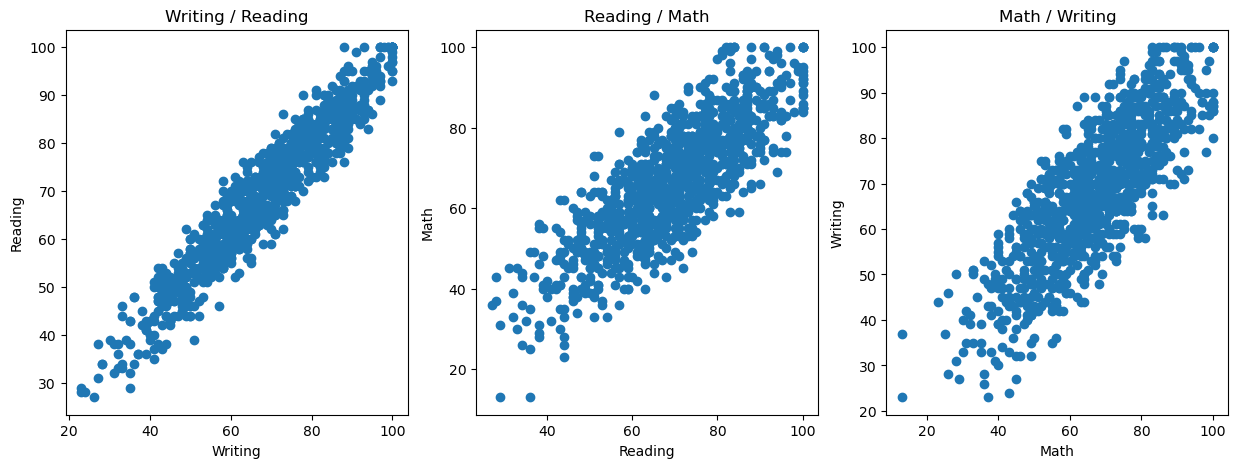

In [35]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                   ncols=3,
                                   figsize=(15,5))
ax0.scatter(df["writing score"], df["reading score"])
ax0.set(title="Writing / Reading", xlabel="Writing", ylabel="Reading")
ax1.scatter(df["reading score"], df["math score"])
ax1.set(title="Reading / Math", xlabel="Reading", ylabel="Math")
ax2.scatter(df["math score"], df["writing score"])
ax2.set(title="Math / Writing", xlabel="Math", ylabel="Writing");

## Replace Text with Numeric Data
Replacing values to work with the data

In [36]:
df.replace(to_replace="male", value=1, inplace=True)
df.replace(to_replace="female", value=2, inplace=True)
df.replace(to_replace="group A", value=1, inplace=True)
df.replace(to_replace="group B", value=2, inplace=True)
df.replace(to_replace="group C", value=3, inplace=True)
df.replace(to_replace="group D", value=4, inplace=True)
df.replace(to_replace="group E", value=5, inplace=True)
df.replace(to_replace="some high school", value=1, inplace=True)
df.replace(to_replace="high school", value=2, inplace=True)
df.replace(to_replace="some college", value=3, inplace=True)
df.replace(to_replace="associate's degree", value=4, inplace=True)
df.replace(to_replace="bachelor's degree", value=5, inplace=True)
df.replace(to_replace="master's degree", value=6, inplace=True)
df.replace(to_replace="free/reduced", value=1, inplace=True)
df.replace(to_replace="standard", value=2, inplace=True)
df.replace(to_replace="completed", value=1, inplace=True)
df.replace(to_replace="none", value=2, inplace=True)

for grade in range(60, 101):
    df["math score"].replace(to_replace=grade, value='pass', inplace=True)
    df["reading score"].replace(to_replace=grade, value='pass', inplace=True)
    df["writing score"].replace(to_replace=grade, value='pass', inplace=True)
    
for grade in range(0, 60):
    df["math score"].replace(to_replace=grade, value='fail', inplace=True)
    df["reading score"].replace(to_replace=grade, value='fail', inplace=True)
    df["writing score"].replace(to_replace=grade, value='fail', inplace=True)

# Create the Logistic Regression Model
Set columns or groups of columns. We also create input variables (a, b, c, d, e).

In [37]:
lm = linear_model.LogisticRegression(max_iter=1000)
math = df.values[:, 5]
reading = df.values[:, 6]
writing = df.values[:, 7]
x = df.values[:, 0:5]

a, b, c, d, e = 0, 0, 0, 0, 0

# Get Input
Here, you type in intergers associated with the selections. Non integer inputs get logged in a text file.

In [38]:
print("Type the associated integer for your answers")

f = open("invalid.txt", "a")

while(a == 0):
    try:
        a = int(input("What is the gender?\n\t1. male\n\t2. female\n"))
    except ValueError:
        print("Integer needed")
        f.write("Non int value typed in for gender\n")
    if (a < 1 or a > 2):
        print("Select a valid option")
        a = 0

while(b == 0):
    try:
        b = int(input("What is the race/ethnicity?\n\t1. Group A\n\t2. Group B\n\t3. Group C\n\t4. Group D\n\t5. Group E\n"))
    except ValueError:
        print("Integer needed")
        f.write("Non int value typed in for race/ethnicity\n")
    if (b < 1 or b > 5):
        print("Select a valid option")
        b = 0

while(c == 0):
    try:
        c = int(input("What is the parental level of education?\n\t1. some high school\n\t2. high school\n\t3. some college\n\t"
            "4. associate's degree\n\t5. bachelor's degree\n\t6. master's degree\n"))
    except ValueError:
        print("Integer needed")
        f.write("Non int value typed in for parental level of education\n")
    if (c < 1 or c > 6):
        print("Select a valid option")
        c = 0

while(d == 0):
    try:
        d = int(input("How is your meal plan structured?\n\t1. free/reduced\n\t2. standard\n"))
    except ValueError:
        print("Integer needed")
        f.write("Non int value typed in for meal plan\n")
    if (d < 1 or d > 2):
        print("Select a valid option")
        d = 0

while(e == 0):
    try:
        e = int(input("Was the test preparation completed?\n\t1. Yes\n\t2. No\n"))
    except ValueError:
        print("Integer needed")
        f.write("Non int value typed in for test preparation\n")
    if (e < 1 or e > 2):
        print("Select a valid option")
        e = 0

f.close()

Type the associated integer for your answers
What is the gender?
	1. male
	2. female
2
What is the race/ethnicity?
	1. Group A
	2. Group B
	3. Group C
	4. Group D
	5. Group E
2
What is the parental level of education?
	1. some high school
	2. high school
	3. some college
	4. associate's degree
	5. bachelor's degree
	6. master's degree
2
How is your meal plan structured?
	1. free/reduced
	2. standard
2
Was the test preparation completed?
	1. Yes
	2. No
1


## Math Training and Predictions

Test size of 20% will be used and tested for all 3 subjects.

In [39]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, math, test_size=0.20)
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
print("Model accuracy for math:")
print(metrics.accuracy_score(y_test, y_pred))

Model accuracy for math:
0.75


The predictions are printed for whether a student is more likely to pass or fail.<br>
Also, the probability of passing is displayed. This is not what their grade is assumed to be.<br>
It is the likelyhood that they pass.

In [40]:
print("For math, the student is more likely to %s." % lm.predict([[a,b,c,d,e]])[0])
print("The probability of passing math is %s. \n" % f'{100*lm.predict_proba([[a,b,c,d,e]])[0][1]:.1f}%')

For math, the student is more likely to pass.
The probability of passing math is 58.0%. 



## Reading Training and Predictions

In [41]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, reading, test_size=0.20)
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
print("Model accuracy for reading:")
print(metrics.accuracy_score(y_test, y_pred))

Model accuracy for reading:
0.81


In [42]:
print("For reading, the student is more likely to %s." % lm.predict([[a,b,c,d,e]])[0])
print("The probability of passing reading is %s. \n" % f'{100*lm.predict_proba([[a,b,c,d,e]])[0][1]:.1f}%')

For reading, the student is more likely to pass.
The probability of passing reading is 89.4%. 



## Writing Training and Predictions

In [43]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, writing, test_size=0.20)
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
print("Model accuracy for writing:")
print(metrics.accuracy_score(y_test, y_pred))

Model accuracy for writing:
0.79


In [44]:
print("For writing, the student is more likely to %s." % lm.predict([[a,b,c,d,e]])[0])
print("The probability of passing writing is %s. \n" % f'{100*lm.predict_proba([[a,b,c,d,e]])[0][1]:.1f}%')

For writing, the student is more likely to pass.
The probability of passing writing is 92.6%. 

